# Lending Club Case Study

## Method: Exploratory Data Analysis

### Business Understanding

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
<br>When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s 
profile. Two types of risks are associated with the bank’s decision:
<ul>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</ul>
<ul>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company</ul>

There are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:
    **1. Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
    **2. Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    **3. Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company.

### Business Objective

Like most other lending companies, **lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss)**. In other words, borrowers who default cause the largest amount of loss to the lenders.
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.
In other words, **the company wants to understand the driving factors (or driver variables) behind loan default**, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Problem Statement

As a data scientist working for Lending Club, perform EDA  on the given past loan dataset to identify the key consumer attributes and loan attributes that influence the tendency of default.

### Data Understanding

We have been provided with below datasets:
<br>**1. Loan Data:** It contains the complete loan data for all loans issued through the time period 2007 t0 2011.
<br>**2. Data Dictionary:** It describes the meaning of variables in the Loan Dataset 

In [3]:
#Import Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.color_palette("RdYlGn", 10)

import warnings
warnings.filterwarnings('ignore')

In [126]:
#Read Loans Data
loans=pd.read_csv('loan.csv',encoding='iso-8859-1', low_memory=False)

In [127]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loans.shape

(39717, 111)

<blockquote>The dataset has total 39717 rows and 111 columns</blockquote>

In [7]:
# Set option to mke all the columns and rows visible in case required
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [8]:
#Have a look at sample data
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
#Check for footers or summary rows
loans.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
# Have a look at the summary data
loans.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<blockquote>**Observation:**
<ol><li>There is no additional header or footer rows present which needs to be deleted.</li>
<li>Some of the key columns for analysis can be loan_status, loan_amnt, term, int_rate, grade, emp_length, annual_inc,issue_d, purpose etc.
<li>Significant number of columns have null values all rows. Example: annual_inc_joint</li>
<li>Some of the columns have all values as zeroes. Example: collections_12_mths_ex_med,acc_now_delinq .</li>
<li>During analysis it will be key to identify how the target variable loan_status is impacted by the other independent variables.
<li>Some of the attributes may have outliers , for example: out_prncp has 90% records with value 0, but max is 6311.47 which is quite high. Only 1% of the records have values.
<li>In the next section we will deep dive into the data for better understanding of the anomalies in the data (if any) and build a clean dataset for our analysis</li><ol></blockquote>

In [11]:
# Get number of unique values
loans.nunique().sort_values()

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


<blockquote>**More Observation:**
<ol><li>There are attributes for which number of unique values is zero i.e. all rows are null. Example: verification_status_joint </li>
<li>There are some columns for which number of unique values is one i.e. all rows have same values. Example:pymnt_plan.</li>
<li>Categorical variables can be identified with low unique values, such as: term, loan_status etc. On the other hand there are variables which are continuous , such as: loan_amnt</li></ol>
</blockquote>

### Data Cleaning

In [12]:
#Check for percentage of missing values in columns
round(loans.isnull().sum(axis=0)/len(loans)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          0.00
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

<blockquote>It can be seen that there are many columns where all rows are null. Let's drop such columns.</blockquote>

In [13]:
#Drop columns with all null values
loans=loans.dropna(axis=1, how='all')

In [14]:
# The number of columns reduced to 57 
loans.shape

(39717, 57)

In [15]:
#Find %of missing values in the remaining columns
round(loans.isnull().sum(axis=0)/len(loans)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

Below columns can also be dropped:
<br>**desc:** Although this column has values in approx 70% of the rows, this value can only be used for some text anlytics, but  not useful for predictor of defaulter. Also similar information can be derived from purpose and title columns.
<br>**next_pymnt_d:** 97% rows have null values, so won't help in analysis
<br>**mths_since_last_record:** approx 93% rows have null, so won't help in analysis
<br>**mths_since_last_delinq**: 64% rows have null values. Also months since last delinquent represents the number months passed since the person last fell into the 90 DPD(days past due) group. Since at the time of loan application, we will not have this data, it cannot be used as a predictor of default at the time of loan approval.

In [16]:
loans=loans.drop(['desc','next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1)

In [17]:
loans.shape

(39717, 53)

In [18]:
#Find count of unique values per column
loans.nunique(dropna=True).sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       12
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [19]:
#Drop columns where only only 1 unique value is present
loans=loans.loc[:, loans.nunique(dropna=True) > 1]

In [20]:
#Number of columns reduced to 44
loans.shape

(39717, 44)

In [21]:
#Find % of nulls in all columns
round(loans.isnull().sum(axis=0)/len(loans)*100,2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

In [22]:
#Now let's have a look at the type and format of columns
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [23]:
#Strip months from term to have the number values only
loans['term']=loans.term.apply(lambda x: x.split()[0]).astype('int64')

In [24]:
#Strip % sign from int_rate and revol_util columns
loans['int_rate']=loans['int_rate'].str.strip('%').astype('float')
loans['revol_util']=loans['revol_util'].str.strip('%').astype('float')

In [25]:
#List unique values in emp length column
loans['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

In [26]:
#Define Dictionary to assign just the number of years to the field
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [27]:
loans = loans.replace({"emp_length": emp_length_dict})

In [28]:
loans.shape

(39717, 44)

In [29]:
#Convert date attributes to datetime format
loans['earliest_cr_line']=pd.to_datetime(loans['earliest_cr_line'], format='%b-%y')
loans['issue_d']=pd.to_datetime(loans['issue_d'],format='%b-%y')
loans['last_pymnt_d']=pd.to_datetime(loans['last_pymnt_d'],format='%b-%y')
loans['last_credit_pull_d']=pd.to_datetime(loans['last_credit_pull_d'],format='%b-%y')

In [30]:
#Split date attributes to Month and Year
loans['earliest_cr_line_month']=loans['earliest_cr_line'].dt.month
loans['earliest_cr_line_year']=loans['earliest_cr_line'].dt.year
loans['issue_d_month']=loans['issue_d'].dt.month
loans['issue_d_year']=loans['issue_d'].dt.year
loans['last_pymnt_d_month']=loans['last_pymnt_d'].dt.month
loans['last_pymnt_d_year']=loans['last_pymnt_d'].dt.year
loans['last_credit_pull_d_month']=loans['last_credit_pull_d'].dt.month
loans['last_credit_pull_d_year']=loans['last_credit_pull_d'].dt.year

In [31]:
#Drop the actual date columns as the values are now present in month year column pairs
loans=loans.drop(['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d'],axis=1)

In [32]:
#Delete rows where pub_rec_bankruptcies is null
loans=loans[~loans['emp_title'].isnull()]

In [33]:
#Delete rows where emp_title is null
loans=loans[~loans['pub_rec_bankruptcies'].isnull()]

In [34]:
#Delete rows where last_pymnt_d_month is null
loans=loans[~loans['last_pymnt_d_month'].isnull()]

In [35]:
#Delete rows where revol_util is null
loans=loans[~loans['revol_util'].isnull()]

In [36]:
#Delete rows where title is null
loans=loans[~loans['title'].isnull()]

In [37]:
#Standardize columns to have 2 decimal place
loans.total_pymnt=round(loans.total_pymnt,2).astype('float')
loans.total_rec_late_fee= round(loans.total_rec_late_fee,2).astype('float')
loans.collection_recovery_fee= round(loans.collection_recovery_fee,2).astype('float')

In [38]:
#List unique values of earliest_cr_line_year
loans.earliest_cr_line_year.unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2068, 1974, 2067, 2065, 2063,
       2066, 2062, 2056, 2046, 2050, 2064, 2054], dtype=int64)

<blockquote>Looks like some of the year is showing wrong values , such as: 2064, 2054 etc. whereas it should have been 1964, 1954 etc. Let's correct those.</blockquote>

In [39]:
loans.loc[loans['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loans['earliest_cr_line_year'] - 100

In [40]:
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.0,0,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,4,1999,12,2011,4.0,2013.0,9.0,2013.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.0,0,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,2,1996,12,2011,1.0,2015.0,4.0,2016.0


In [41]:
loans.shape

(36491, 48)

In [42]:
#Drop duplicate records (if any)
loans.drop_duplicates(keep=False,inplace=True)

In [43]:
loans.shape

(36491, 48)

<blockquote>Let's look further if more irrelevant columns can be dropped:
<br>url: is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
<br>zip_code: first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis</blockquote>

In [44]:
loans=loans.drop(['url','zip_code'],axis=1)

### Data Analysis

In [45]:
loans.shape

(36491, 46)

In [46]:
loans.groupby('loan_status')['loan_status'].count().sort_values()

loan_status
Current         1067
Charged Off     4955
Fully Paid     30469
Name: loan_status, dtype: int64

<blockquote>The ones marked 'current' are neither fully paid nor defaulted, so these records won't help in analysis. Delete rows where loan_status is 'Current'.</blockquote>

In [47]:
loans=loans[loans.loan_status!='Current']

In [48]:
loans.shape

(35424, 46)

In [49]:
loans.nunique().sort_values()

out_prncp_inv                   1
out_prncp                       1
loan_status                     2
term                            2
verification_status             3
pub_rec_bankruptcies            3
home_ownership                  4
pub_rec                         5
issue_d_year                    5
grade                           7
last_credit_pull_d_year         9
last_pymnt_d_year               9
inq_last_6mths                  9
delinq_2yrs                    11
emp_length                     12
earliest_cr_line_month         12
issue_d_month                  12
last_pymnt_d_month             12
last_credit_pull_d_month       12
purpose                        14
sub_grade                      35
open_acc                       38
addr_state                     49
earliest_cr_line_year          51
total_acc                      79
int_rate                      334
total_rec_late_fee            697
loan_amnt                     848
funded_amnt                  1002
revol_util    

In [50]:
#Further delete columns with only a single unique value
loans=loans.loc[:, loans.nunique(dropna=True) > 1]

In [51]:
loans.shape

(35424, 44)

Remaining variables in the dataset can be classified into below categories:

1. Applicant demographic variables such as age, occupation, employment details etc.
2. Loan characteristics variables such as: amount of loan, interest rate, purpose of loan etc.
3. Customer behavioural variables, those which are generated after the loan is approved such as total_pymnt_inv,total_rec_prncp,
total_rec_int etc.

As the third category data won't be available at the time of loan applications, hence they won't help in this analysis and can be dropped.

The variables falls under the 3rd cateory are as follows:
<ol><li>inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) </li>
<li>total_pymnt_inv: Payments received to date for portion of total amount funded by investors </li>
<li>total_rec_prncp: Principal received to date</li>
<li>total_rec_int: Interest received to date</li>
<li>total_rec_late_fee: Late fees received to date</li>
<li>recoveries: post charge off gross recovery</li>
<li>collection_recovery_fee: post charge off collection fee</li>
<li>last_pymnt_d: Last month payment was received</li>
<li>last_pymnt_amnt: Last total payment amount received</li>
<li>last_credit_pull_d</li></ol> 

In [52]:
#Drop the columns that are not required
loans_final=loans.drop(['inq_last_6mths', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d_month','last_pymnt_d_year', 'last_pymnt_amnt', 'last_credit_pull_d_year','last_credit_pull_d_month'],axis=1)

In [53]:
loans_final.shape

(35424, 32)

In [54]:
loans_final.drop_duplicates(keep=False,inplace=True)

In [55]:
loans_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35424 entries, 1 to 39680
Data columns (total 32 columns):
id                        35424 non-null int64
member_id                 35424 non-null int64
loan_amnt                 35424 non-null int64
funded_amnt               35424 non-null int64
funded_amnt_inv           35424 non-null float64
term                      35424 non-null int64
int_rate                  35424 non-null float64
installment               35424 non-null float64
grade                     35424 non-null object
sub_grade                 35424 non-null object
emp_title                 35424 non-null object
emp_length                35424 non-null object
home_ownership            35424 non-null object
annual_inc                35424 non-null float64
verification_status       35424 non-null object
loan_status               35424 non-null object
purpose                   35424 non-null object
title                     35424 non-null object
addr_state                35

### Univariate and Segmented Univariate Analysis

Let's start with the key categorical variable in other words the key target variable: loan_status
#### loan_status:
Current status of the loan

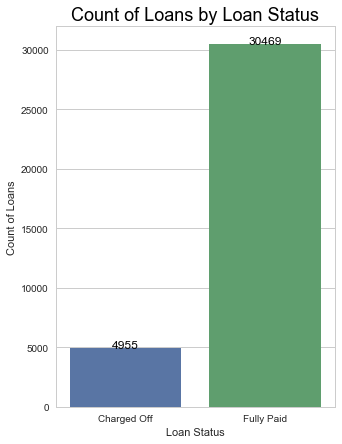

In [56]:
# barplot: Count of loans by Loan Status
plt.figure(figsize=(5,7))
plt.rcParams['text.color'] = 'black'
ax = loans_final.groupby('loan_status').loan_amnt.count().reset_index()
s=sns.barplot(x='loan_status', y='loan_amnt',data=ax)
s.set_title('Count of Loans by Loan Status',fontsize =18,color='Black')
s.set(xlabel='Loan Status', ylabel='Count of Loans')
for index, row in ax.iterrows():
    s.text(row.name,row.loan_amnt, row.loan_amnt, color='black', ha="center")

plt.show()

In [57]:
print(round(loans_final.loc[loans_final['loan_status'] == 'Charged Off'].loan_status.count()/len(loans_final)*100,2))

13.99


<blockquote>**Approx.** 14% loans in the dataset are defaulted</blockquote>

Now, let's have a look at one of the key continuous variable loan_amnt.
#### loan_amnt:
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

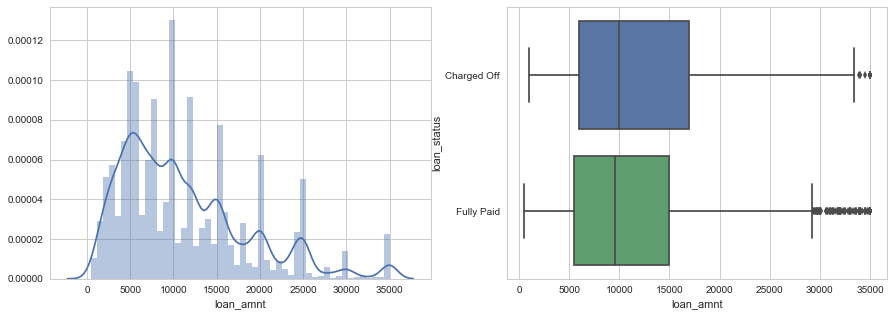

In [58]:
# distplot and boxplot: loan_amnt
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['loan_amnt'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [59]:
loans_final.groupby('loan_status')['loan_amnt'].describe(percentiles=[0.25,0.5,0.75,0.85,0.9,0.95,0.99])

,count,mean,std,min,25%,50%,75%,85%,90%,95%,99%,max
loan_status,,,,,,,,,,,,
Charged Off,4955.0,12274.772957,8062.546584,1000.0,6000.0,10000.0,16975.0,21000.0,25000.0,28000.0,35000.0,35000.0
Fully Paid,30469.0,10941.066330,7181.739211,500.0,5500.0,9600.0,15000.0,19000.0,21000.0,25000.0,35000.0,35000.0


Loan amount distribution is slightly **right skewed**. Average loan amount is higher for Charged off loans. 85% of the loans that were charged off are less than 21000.

#### Other Categorical variables
Before starting analysis on the Categorical variables, let's define some plot functions

In [60]:
#This function will give us two barplots of variable count by group, 1. on the entire loan dataset 
#2. on the charged off loans only
def category_count(df, by):
        plt.subplot(1, 2, 1)
        values = df.groupby(by).loan_amnt.count().sort_values(ascending=False).reset_index()
        ax=sns.barplot(x=by, y='loan_amnt',data=values)
        ax.set_ylabel('Count in dataset', fontsize=16)
        ax.set_xlabel(by, fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        for index, row in values.iterrows():
            ax.text(row.name,row.loan_amnt, row.loan_amnt, color='black', ha="center")
            
        
        plt.subplot(1, 2, 2)
        values = df.loc[loans_final['loan_status']=='Charged Off'].groupby(by).loan_amnt.count().sort_values(ascending=False).reset_index()
        ax=sns.barplot(x=by, y='loan_amnt',data=values)
        ax.set_ylabel('Count in Charged Off Dataset', fontsize=16)
        ax.set_xlabel(by, fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        for index, row in values.iterrows():
            ax.text(row.name,row.loan_amnt, row.loan_amnt, color='black', ha="center")
        
        plt.show()

In [61]:
# This function will give us two plots of categorical variables, percentage each group, 
# 1. Percentage of categories in the whole dataset
# 2. Percentage of categories in the charged off dataset
def category_percent(df, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar()
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    plt.subplot(1, 2, 2)
    values = (df.loc[loans['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar()
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    plt.show()

#### term:
The number of payments on the loan. Values are in months and can be either 36 or 60.


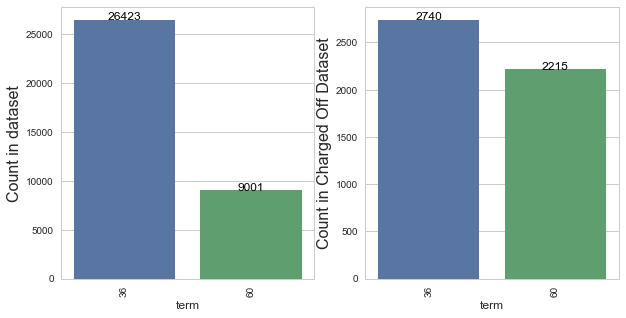

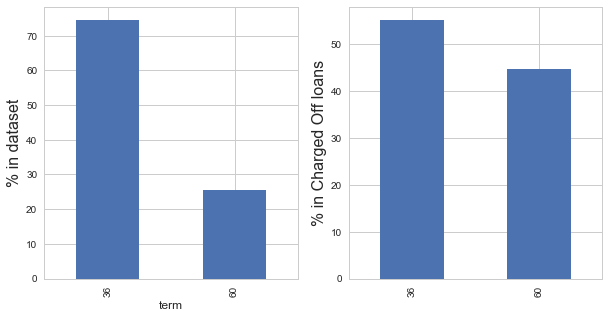

In [62]:
plt.figure(figsize=(10,5))
category_count(loans_final, 'term')
plt.figure(figsize=(10,5))
category_percent(loans_final, 'term')

Approx. 75% of the loans are with 3 years term. And the pattern is similar in the Charged off loans as well. Approx 55% 
of the charged off loans are with 3 years term.

#### purpose:
A category provided by the borrower for the loan request.

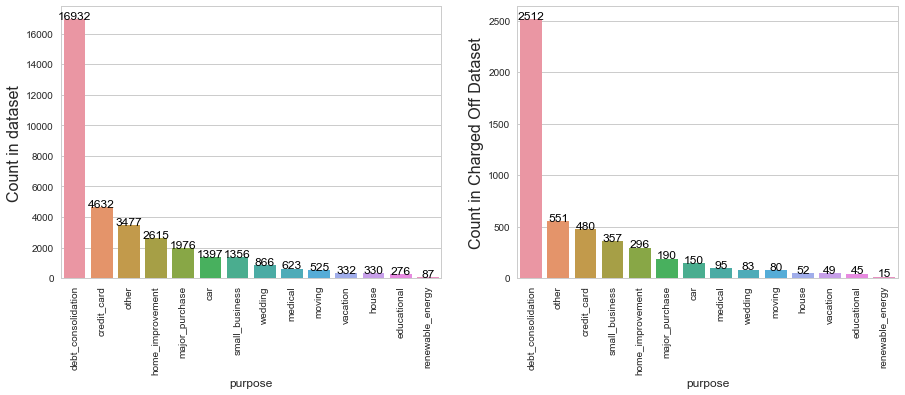

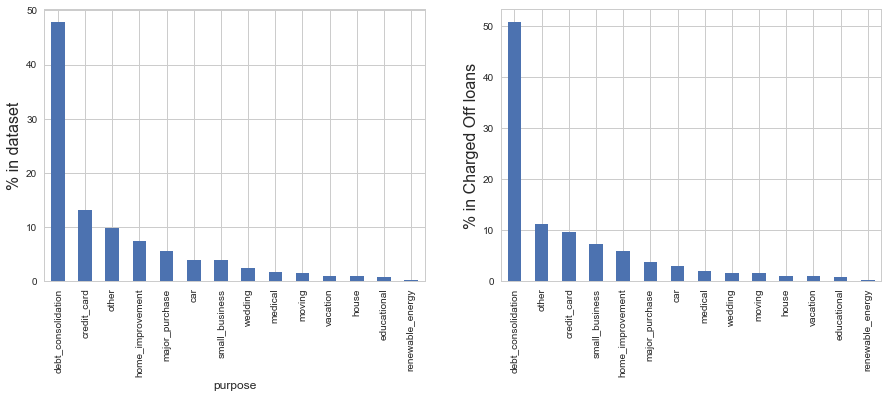

In [63]:
# plot purpose
plt.figure(figsize=(15,5))
category_count(loans_final, 'purpose')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'purpose')

<blockquote>
<br>**Top 3** purpose remains same in the whole dataset and the charged off data i.e. debt_consolidation,credit_card and others
<br>**debt_consolidation** is by far the main purpose of taking loans. **Approx. 50%** of the loans taken are for debt_consolidation
<br>**small_business** came up the order significantly (almost doubled) in the charged off dataset</blockquote> 

#### pub_rec_bankruptcies:
Number of public record bankruptcies

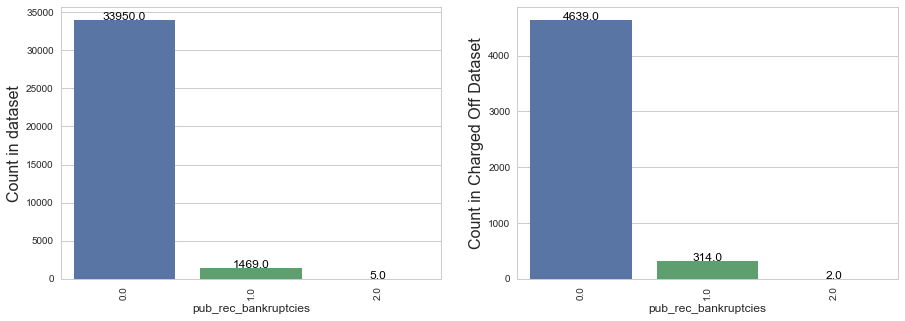

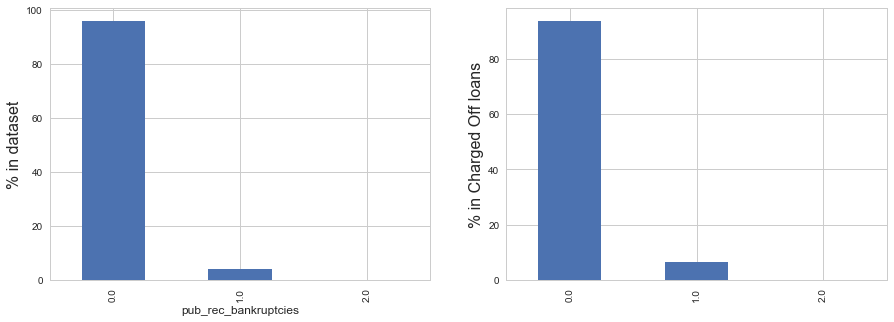

In [64]:
# plot pub_rec_bankruptcies
plt.figure(figsize=(15,5))
category_count(loans_final, 'pub_rec_bankruptcies')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'pub_rec_bankruptcies')

**Analysis:**
<br> 1. Most of the borrower doens't have prior record of bankruptcies.
<br> 2. However, with even a single bankruptcy record default rate increases significanly (**~8% increase**).

#### verification_status:
Indicates if income was verified by LC, not verified, or if the income source was verified

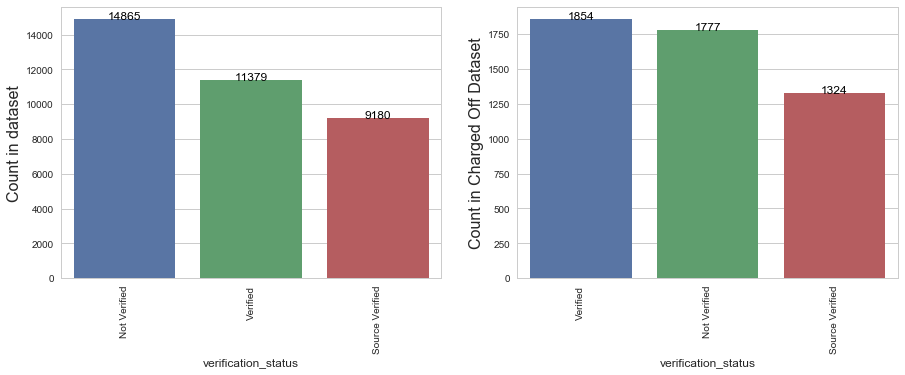

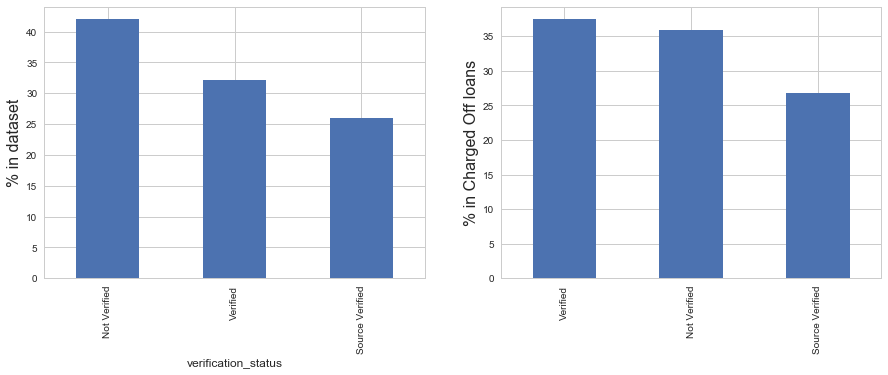

In [65]:
# plot verification_status
plt.figure(figsize=(15,5))
category_count(loans_final, 'verification_status')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'verification_status')

**Analysis:**
<br> 1. In the overall dataset, Percentage of 'Not Verified' loans is more than 'Verified' or 'Source Verified' loans.
<br> 2. Perentage of Charged-off loans is more for 'Verified' loans, which is unexpected.

#### Home Ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

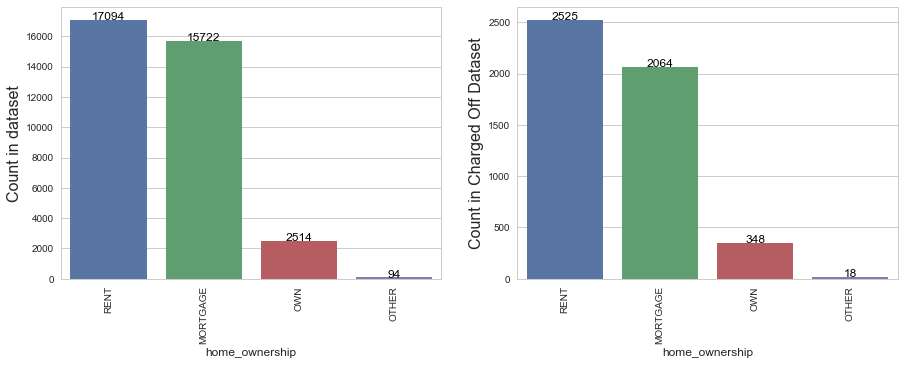

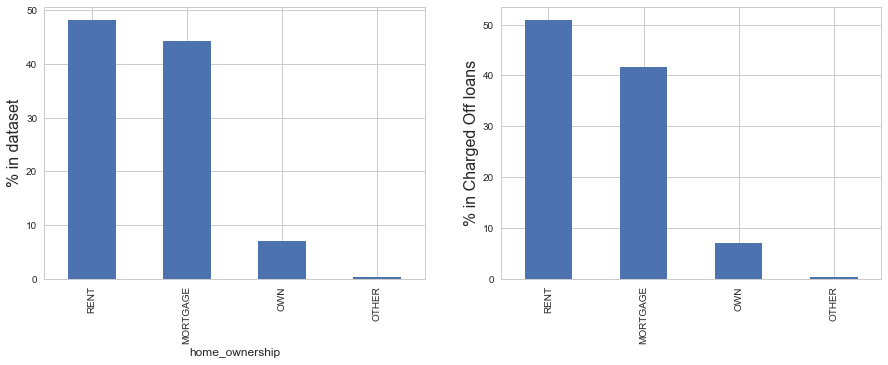

In [66]:
# plot home_ownership
plt.figure(figsize=(15,5))
category_count(loans_final, 'home_ownership')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'home_ownership')

**Analysis:**
<br>Borrowers who are staying on Rent or having mortgages are more likely to Default. 

#### pub_rec
Number of derogatory public records

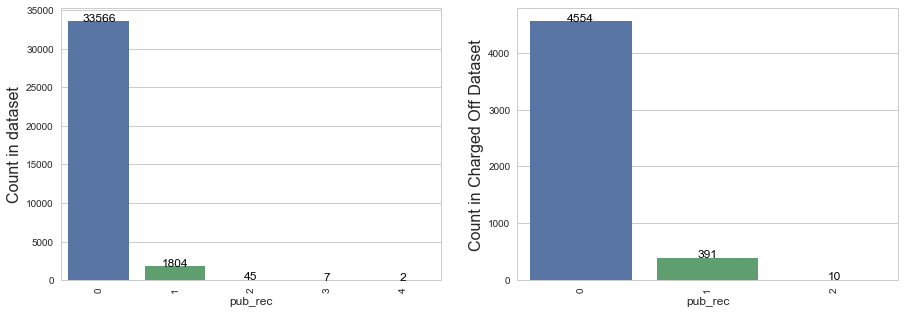

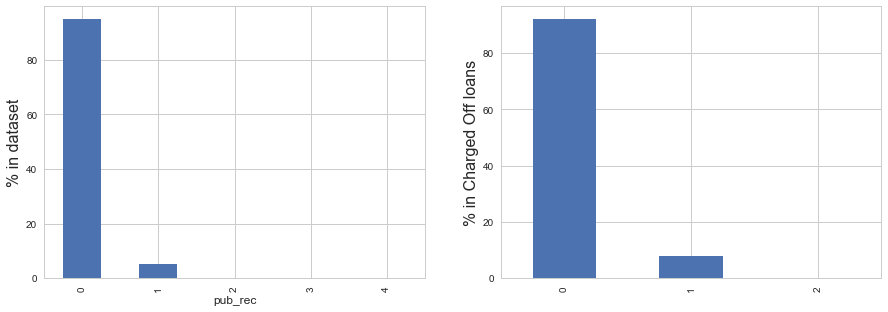

In [67]:
# plot pub_rec
plt.figure(figsize=(15,5))
category_count(loans_final, 'pub_rec')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'pub_rec')

**Analysis:**
<br>1. Approx. 95% of borrowers doesn't have any derogatory public records
<br>2. However, having a single derogatory record increases chance of charge off by **~8%**. 

**issue_d_year**
<br>The year which the loan was funded

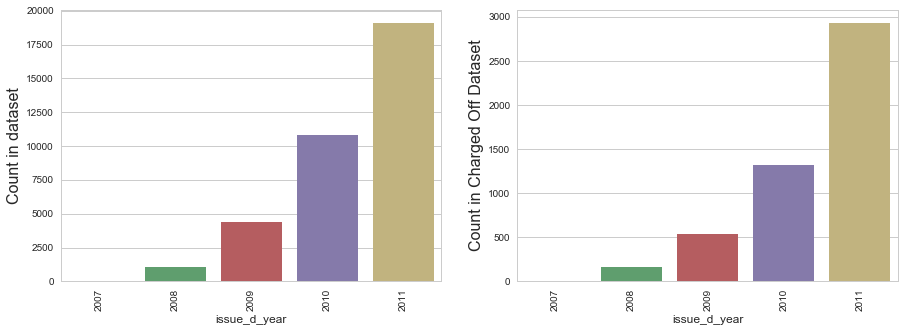

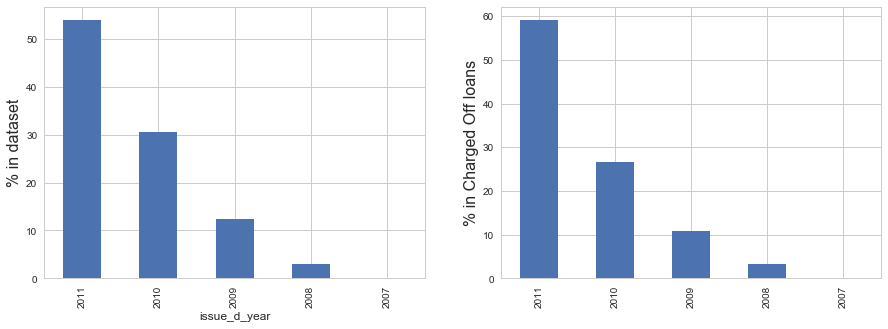

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
values = loans_final.groupby('issue_d_year').loan_amnt.count().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='issue_d_year', y='loan_amnt',data=values)
ax.set_ylabel('Count in dataset', fontsize=16)
ax.set_xlabel('issue_d_year', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplot(1, 2, 2)
values = loans_final.loc[loans_final['loan_status']=='Charged Off'].groupby('issue_d_year').loan_amnt.count().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='issue_d_year', y='loan_amnt',data=values)
ax.set_ylabel('Count in Charged Off Dataset', fontsize=16)
ax.set_xlabel('issue_d_year', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.figure(figsize=(15,5))
category_percent(loans_final, 'issue_d_year')

**issue_d_month**
<br>The month which the loan was funded

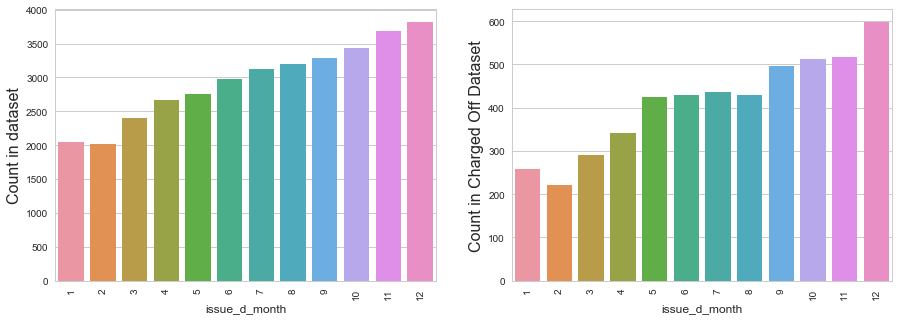

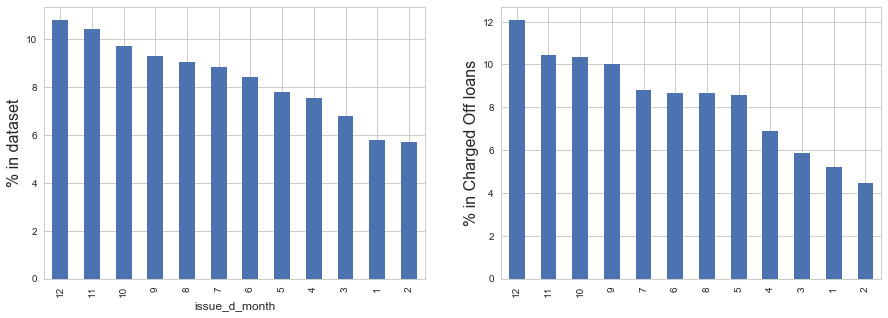

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
values = loans_final.groupby('issue_d_month').loan_amnt.count().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='issue_d_month', y='loan_amnt',data=values)
ax.set_ylabel('Count in dataset', fontsize=16)
ax.set_xlabel('issue_d_month', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplot(1, 2, 2)
values = loans_final.loc[loans_final['loan_status']=='Charged Off'].groupby('issue_d_month').loan_amnt.count().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='issue_d_month', y='loan_amnt',data=values)
ax.set_ylabel('Count in Charged Off Dataset', fontsize=16)
ax.set_xlabel('issue_d_month', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.figure(figsize=(15,5))
category_percent(loans_final, 'issue_d_month')

**Analysis:**
<br>1. Number of loan issued increased steadily over years, mostly from 2008, one of the reason could be the recession.
<br>2. Number of loan issued increases at the end of the year, in the month of December.

#### grade:
LC assigned loan grade

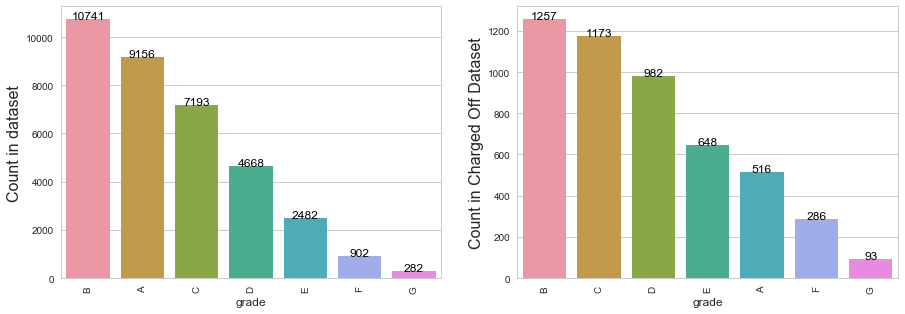

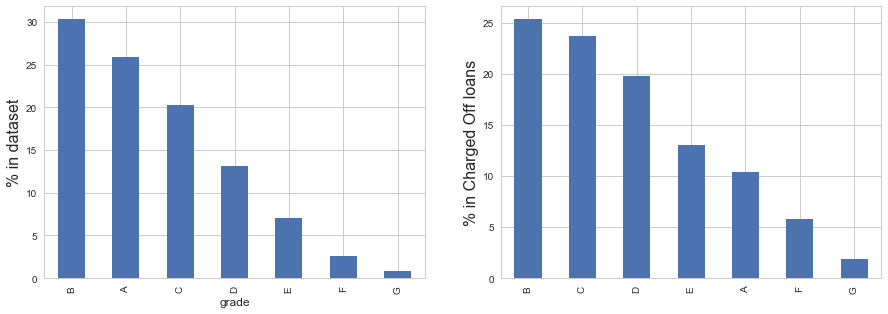

In [70]:
# plot grade
plt.figure(figsize=(15,5))
category_count(loans_final, 'grade')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'grade')

#### sub_grade:
LC assigned loan subgrade

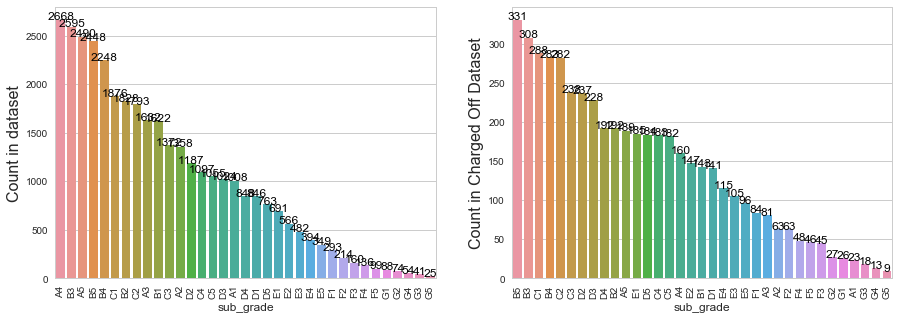

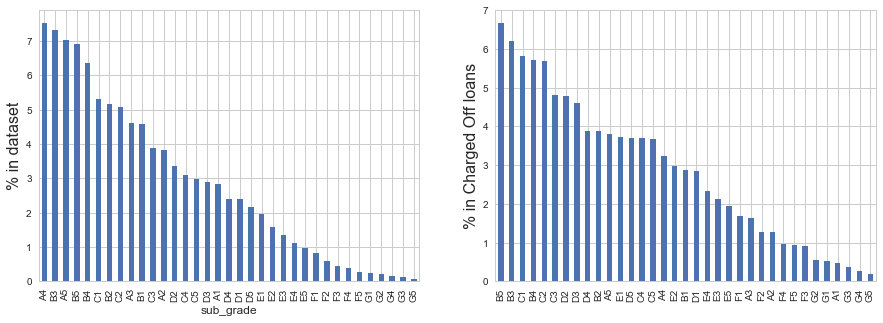

In [71]:
# plot sub_grade
plt.figure(figsize=(15,5))
category_count(loans_final, 'sub_grade')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'sub_grade')

**Analysis:** 
<br>1. Most of the loan issued  and defaulted are of Grade B
<br>2. Most of the charge off happened for the loans of subgrade B5

#### emp_length:
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

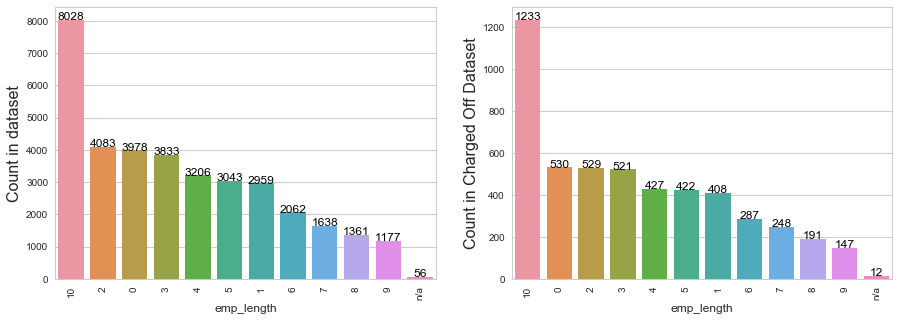

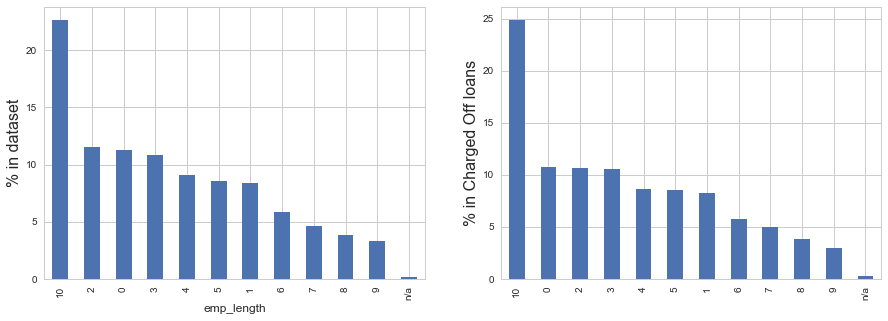

In [72]:
plt.figure(figsize=(15,5))
category_count(loans_final, 'emp_length')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'emp_length')

Let's do some more analysis by deriving a variable and group into different Categroies

In [73]:
# Derive a variable using binning
df=loans_final.loc[loans_final['emp_length']!='n/a']
loans_final['emp_length_grp'] = pd.cut(df['emp_length'], bins=[0,1,3,7,10], labels=['fresher','junior','mid-level','senior'])

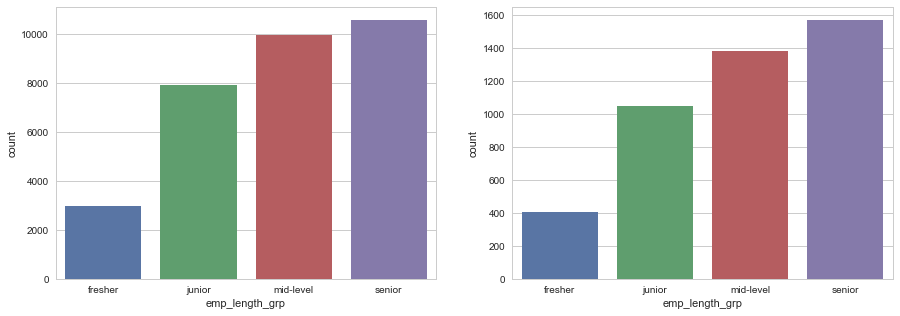

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='emp_length_grp',data=loans_final)
plt.subplot(1,2,2)
sns.countplot(x='emp_length_grp',data=loans_final.loc[loans_final.loan_status=='Charged Off'])

**Analysis:**
<br>1. Most of the borrowers falls into mid-level and senior categories
<br>2. Most of the defaulters also fall into mid-level and senior categories. But if we look percentage wise, default rate looks similar across categories.
<br>3. Number of borrowes gradually increase with years of experiences.

#### addr_state:
The state provided by the borrower in the loan application.

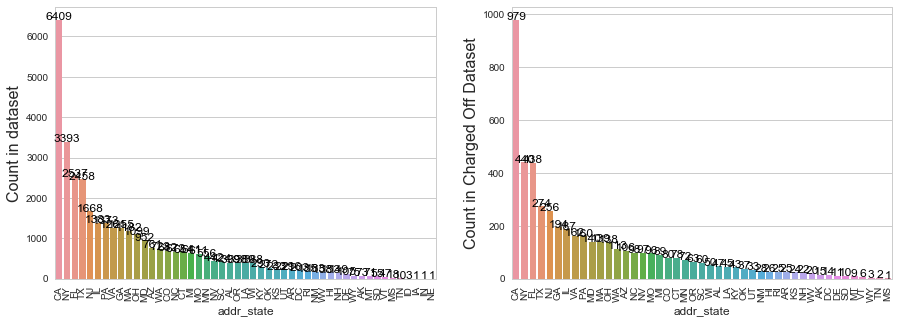

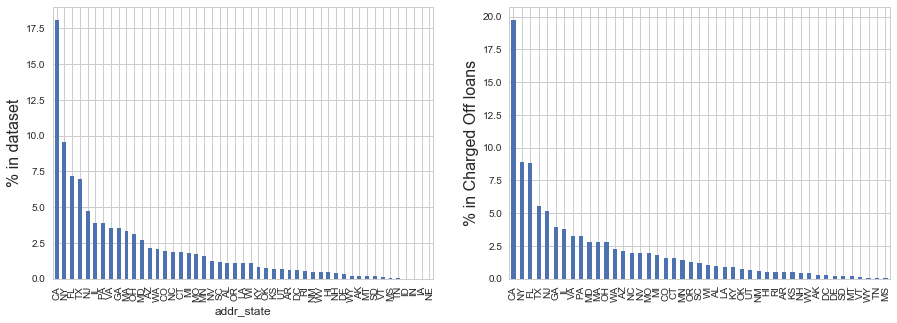

In [75]:
plt.figure(figsize=(15,5))
category_count(loans_final, 'addr_state')
plt.figure(figsize=(15,5))
category_percent(loans_final, 'addr_state')

**Analysis:**
<br>1. Most of the loan applications are from California followed by Newyork.
<br>2. Pattern is same for the loans that were charged off i.e. borrowers from California are the most defaulters.

#### delinq_2yrs:
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

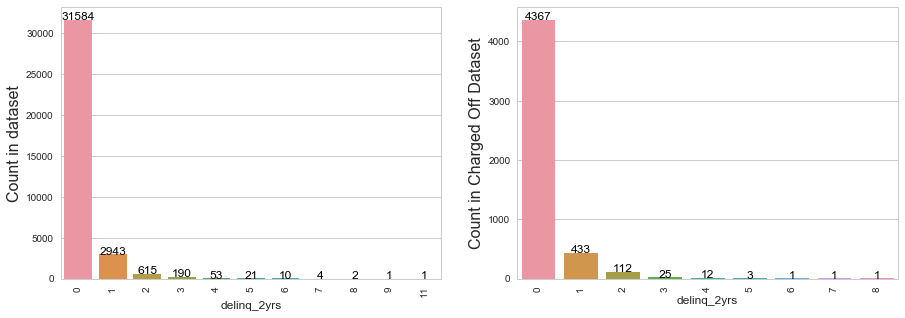

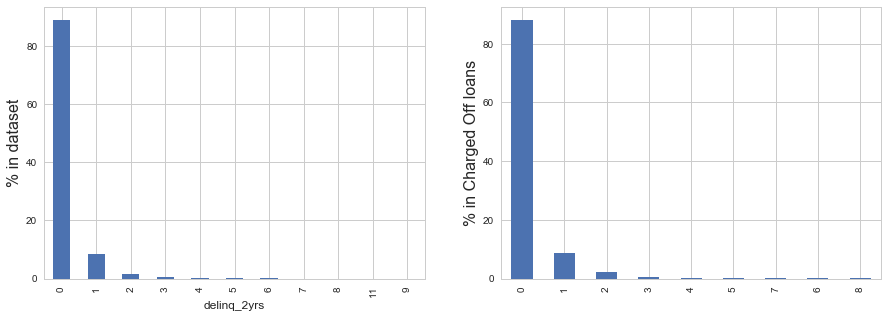

In [76]:
plt.figure(figsize=(15,5))
category_count(loans, 'delinq_2yrs')
plt.figure(figsize=(15,5))
category_percent(loans, 'delinq_2yrs')

**Analysis:**
<br>1. Most of the borrowers doesn't have any 30+ days past-due incidences of delinquency in past 2 years
<br>2. However, chances of charge off increases if borrower has even one such incidences in past 2 years

#### int_rate:
Interest Rate on the loan

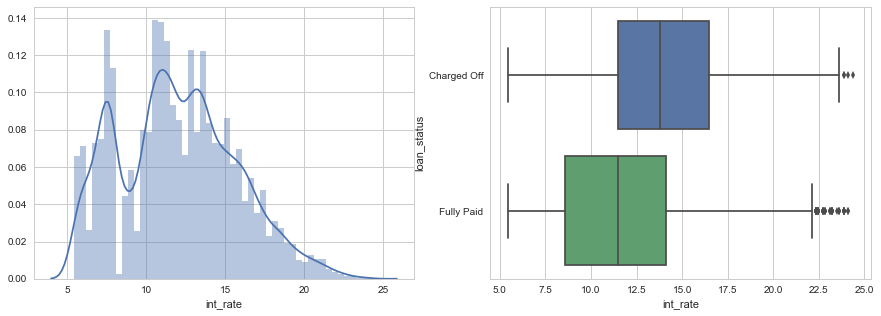

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['int_rate'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['int_rate'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [78]:
loans_final.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4955.0,13.923580,3.648248,5.42,11.485,13.79,16.45,24.40
Fully Paid,30469.0,11.666031,3.613381,5.42,8.590,11.49,14.09,24.11


**Analysis:**
<br>1. Interest rate varies from 5.42% to 24.40% with average interest rate 11.67%.
<br>2. Interest rate is higher in case of loans that were charged off, may be due to the increased risk in approving such loans.  

#### annual_inc:
The self-reported annual income provided by the borrower during registration.

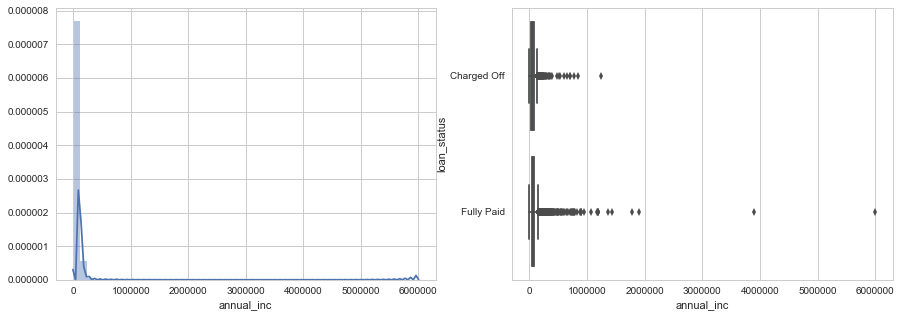

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['annual_inc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['annual_inc'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [80]:
loans_final.groupby('loan_status')['annual_inc'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
loan_status,,,,,,,,,,,
Charged Off,4955.0,62957.575937,47376.009907,4080.0,38400.0,54000.0,75000.0,104002.4,128000.0,200000.00,1250000.0
Fully Paid,30469.0,70048.451171,66181.814490,4000.0,42000.0,60000.0,84000.0,116666.4,140004.0,233322.72,6000000.0


99% of the annual income is below ~230000. Plot annual income excluding the outliers.

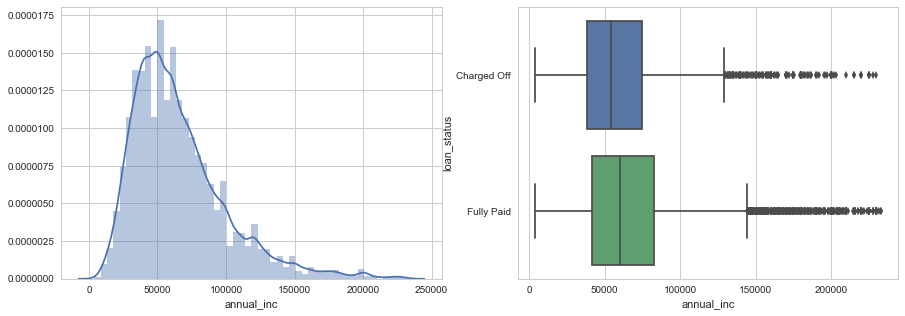

In [81]:
df=loans_final.loc[loans_final['annual_inc']<233400]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['annual_inc'])
plt.subplot(1,2,2)
sns.boxplot(x='annual_inc', y='loan_status', data=loans_final.loc[loans_final['annual_inc']<233400])

**Analysis:**
<br>1. Annual income varies between 4080 and 6000000.
<br>2. 99% of the annual income falls under ~233000.
<br>3. Average income is lower in case of charged off loans.

In [82]:
loans_final['annual_inc_grp'] = pd.cut(loans_final['annual_inc'], bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000], labels=['00k-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-220k','220k-240k'])

Text(0.5,1,'Charged off Loans')

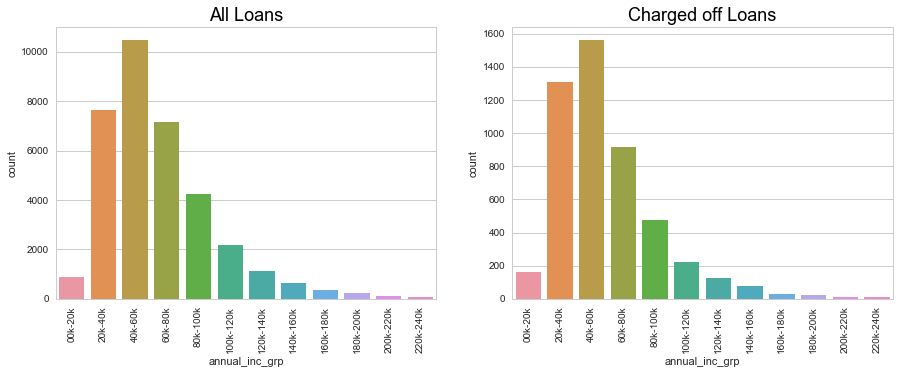

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
s1=sns.countplot(x='annual_inc_grp',data=loans_final)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
s1.set_title('All Loans',fontsize =18,color='Black')
plt.subplot(1,2,2)
s2=sns.countplot(x='annual_inc_grp',data=loans_final.loc[loans_final.loan_status=='Charged Off'])
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
s2.set_title('Charged off Loans',fontsize =18,color='Black')

**Analysis:**
<br>1. Most of the borrowers and defaulters (20 - 60K) are at the low income group, which reduces gradually as the income increases.

#### installment:
The monthly payment owed by the borrower if the loan originates.

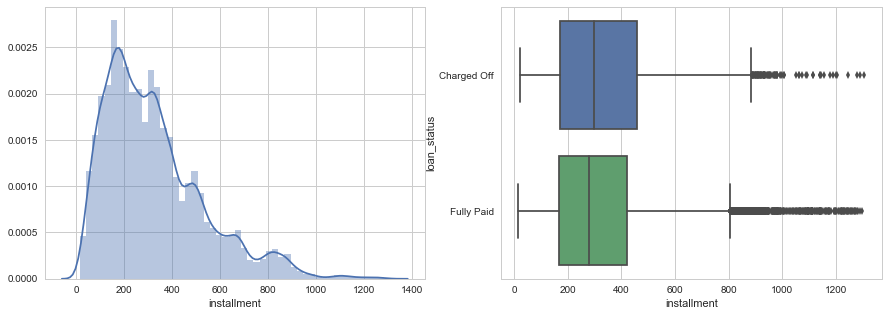

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['installment'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['installment'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [85]:
loans_final['installment'].describe()

count    35424.000000
mean       323.887884
std        207.135966
min         16.080000
25%        167.730000
50%        280.270000
75%        426.470000
max       1305.190000
Name: installment, dtype: float64

**Analysis:**
<br>1. Installment amount mainly varies between 167 and 426 with a average of 323.
<br>2. Average installment amount is slightly higher in case of charged off loans.

#### dti:
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

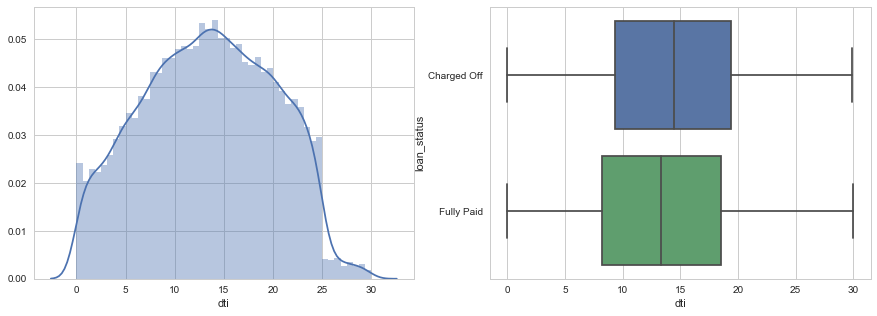

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['dti'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['dti'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [87]:
loans_final['dti'].describe()

count    35424.000000
mean        13.401865
std          6.637801
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [88]:
loans_final['dti_bin']=pd.cut(loans_final['dti'],[0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

Text(0.5,1,'Charged off Loans')

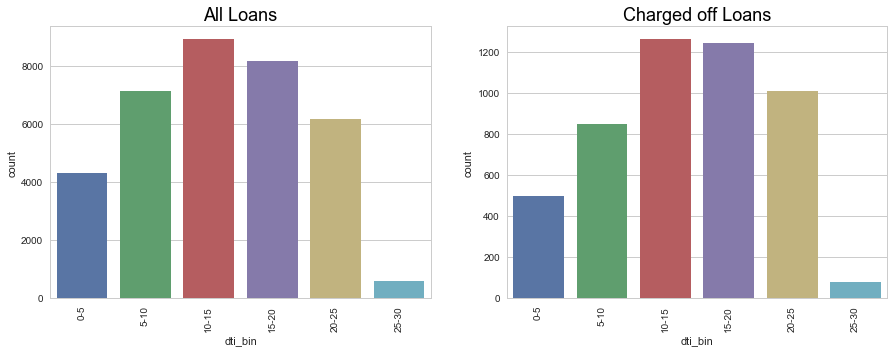

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
s1=sns.countplot(x='dti_bin',data=loans_final)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
s1.set_title('All Loans',fontsize =18,color='Black')
plt.subplot(1,2,2)
s2=sns.countplot(x='dti_bin',data=loans_final.loc[loans_final.loan_status=='Charged Off'])
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
s2.set_title('Charged off Loans',fontsize =18,color='Black')

**Analysis:**
1. Chances of Charge off loans increases with higher dti

#### emp_title:
The job title supplied by the Borrower when applying for the loan.

In [90]:
loans_final['emp_title'].nunique()

27461

In [91]:
emp_title_top10=loans_final.groupby('emp_title')['emp_title'].count().sort_values(ascending=False).head(10)
df=loans_final.loc[loans_final['loan_status']=='Charged Off']
emp_title_top10_chargedoff=df.groupby('emp_title')['emp_title'].count().sort_values(ascending=False).head(10)

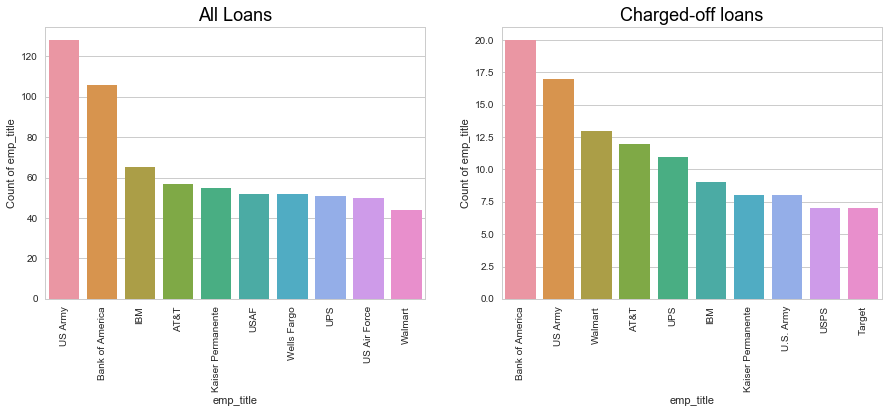

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
a=sns.barplot(x=emp_title_top10.index, y=emp_title_top10.values)
a.set_ylabel('Count of emp_title')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('All Loans',fontsize =18,color='Black')
plt.subplot(1,2,2)
a=sns.barplot(x=emp_title_top10_chargedoff.index, y=emp_title_top10_chargedoff.values)
a.set_ylabel('Count of emp_title')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('Charged-off loans',fontsize =18,color='Black')

plt.show()

**Analysis:**
<br>1. Top 2 borrowers are with Job title US Army and Bank of America.
<br>2. Top 2 defaulters are also with Job title US Army and Bank of America.

#### open_acc:
The number of open credit lines in the borrower's credit file.

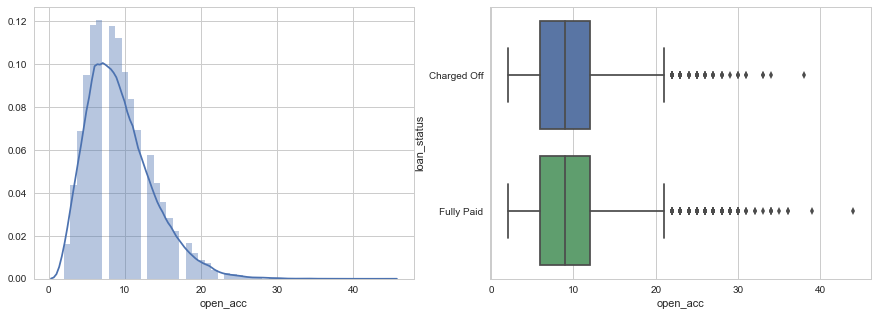

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['open_acc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['open_acc'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [94]:
loans_final.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4955.0,9.305954,4.491417,2.0,6.0,9.0,12.0,38.0
Fully Paid,30469.0,9.333979,4.355763,2.0,6.0,9.0,12.0,44.0


**Analysis**:
<br>1. Most of the borrowers have 6 to 12 open accounts with a mean of 9.
<br>2. From the boxplot it looks like there is not much difference in distribution between charged off and fully paid loan data for open_acc

#### revol_util:
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

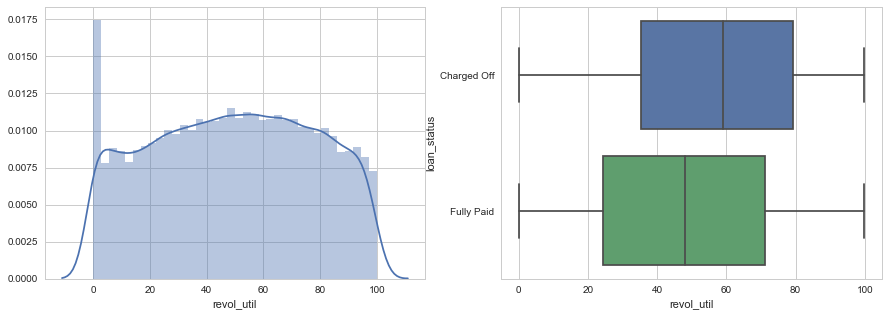

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['revol_util'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['revol_util'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [96]:
loans_final.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4955.0,56.146325,27.636529,0.0,35.45,59.2,79.2,99.9
Fully Paid,30469.0,47.984418,28.155822,0.0,24.50,48.2,71.2,99.9


**Analysis:**
Revolving credit utilization rate is higher in case of loan defaulters. Average is 56% compared to 47% in case of Fully paid loans

#### title: 
The loan title provided by the borrower

In [97]:
loans_final.groupby('loan_status')['title'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,4955,2863,Debt Consolidation,277
Fully Paid,30469,15563,Debt Consolidation,1699


In [98]:
loans_final.title.value_counts().head(10)

Debt Consolidation           1976
Debt Consolidation Loan      1542
Personal Loan                 590
Consolidation                 462
debt consolidation            441
Credit Card Consolidation     326
Home Improvement              325
Debt consolidation            304
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

**Analysis:**
1. Similar analysis has already been done above with the purpose column. So this column is not adding any extra value.

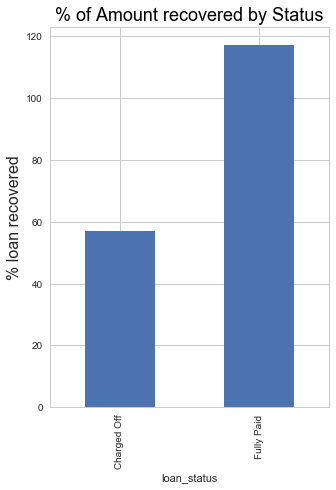

In [99]:
plt.figure(figsize=(5,7))
ax = (loans_final.groupby('loan_status').total_pymnt.sum() * 100 / loans_final.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
ax.set_title('% of Amount recovered by Status',fontsize =18,color='Black')
plt.show()

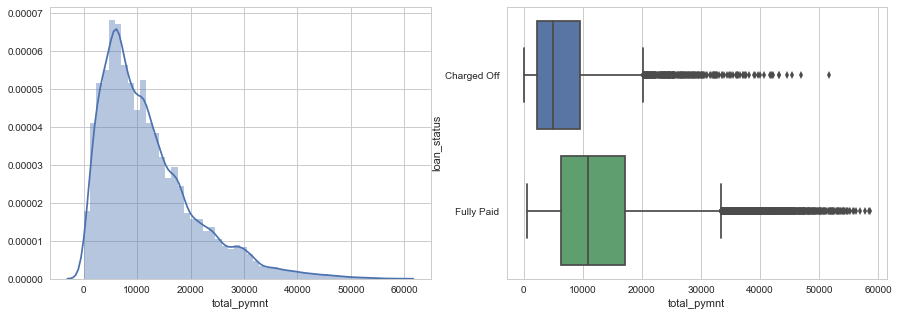

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_final['total_pymnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loans_final['total_pymnt'], y=loans_final['loan_status'], data=loans_final)
plt.show()

In [101]:
loans_final.groupby('loan_status')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4955.0,7010.918174,6682.201804,33.73,2319.91,4980.29,9464.075,51745.45
Fully Paid,30469.0,12827.552356,8853.434733,578.77,6236.59,10815.85,17111.360,58563.68


In [102]:
print(round(loans_final.groupby('loan_status').total_pymnt.sum() / loans_final.groupby('loan_status').loan_amnt.sum(),2))

loan_status
Charged Off    0.57
Fully Paid     1.17
dtype: float64


**Analysis:**
<br>1. Only **57%** of funded amount recovered in case of loans that were charged off. For Fully paid loans company made a profit of **17%**.
<br>2. Total payment received in case of Charged off loans are much lesser, as expected.

But this information won't be available at the time of loan application, so we can ignore.

#### Key takeaways from Univariate and Segmented Univariate Analysis
<br>1. 14% loans in the dataset are defaulted.
<br>2. Average loan amount is higher for Charged off loans. 85% of the loans that were charged off are less than 21000.
<br>3. 75% of all loans are with term as 36 months.For Charged off loans it's 55%.
<br>4. Top 3 purpose remains same in the whole dataset and the charged off data i.e. debt_consolidation,credit_card and others, debt_consolidation being at the top with approx. 50% share of the total loans.
<br>5. Most of the borrower doens't have prior record of bankruptcies, but chances of default increases with even a single record of bankruptcy.
<br>6. Perentage of Charged-off loans is more for 'Verified' loans, which is unexpected.
<br>7. Borrowers who are staying on Rent or having mortgages are more likely to Default.
<br>8. Approx. 95% of borrowers doesn't have any derogatory public records, however, chances of default increases with increased derogatory record.
<br>9. Number of loan issued increases at the end of the year, in the month of December.
<br>10. Most of the loan issued and defaulted are of Grade B and sub grade B5.
<br>11. Number of borrowes gradually increase with number of experiences.
<br>12. Most of the loan defaulters are from California followed by Newyork.
<br>13. Most of the borrowers doesn't have any 30+ days past-due incidences of delinquency in past 2 years, however chances of default increases with even one such incidences.
<br>14. Interest rate is higher in case of loans that were charged off.
<br>15. Average income is lower in case of charged off loans.
<br>16. Most of the borrowers and defaulters (20 - 60K) are at the low income group, and default rate reduces gradually as the income increases.
<br>17. Average installment amount is slightly higher in case of charged off loans.
<br>18. Chances of Charge off loans increases with higher dti or debt to income ratio.
<br>19. Top 2 borrowers are with Job title US Army and Bank of America.
<br>20. Revolving credit utilization rate is higher in case of loan defaulters.
<br>21. 57% of funded amount recovered in case of loans that were charged off. For Fully paid loans company made a profit of 17%.

### Bivariate Analysis

**We are performing Bivariate Analysis in the below classifications,**


<br> 1.Continous vs Categorical variable
<br> 2.Categorical vs Categorical variable
<br> 3.Continous vs Continous variable

**1.Continous vs Categorical variable**

Define function for Continuous vs Categorical Box plots

In [103]:
def cont_cat_plot(df,a,b):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    s=sns.boxplot(x=a, y=b, data=df)
    s.set_title('All loans',fontsize =18,color='Black')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.subplot(1,2,2)
    s=sns.boxplot(x=a, y=b, data=df.loc[df['loan_status']=='Charged Off'])
    s.set_title('Charged off loans',fontsize =18,color='Black')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show()

**loan_amt vs grade**

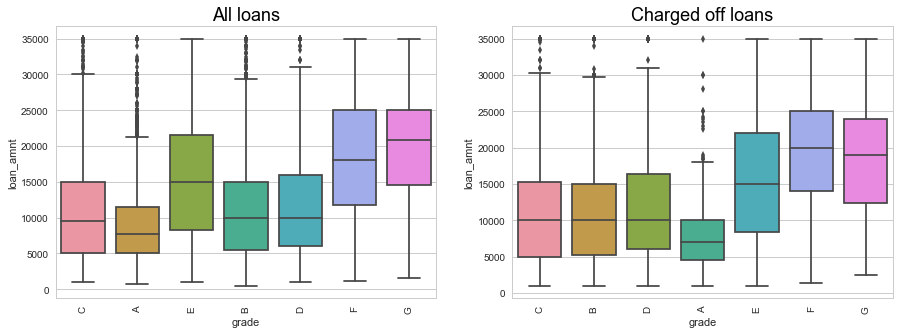

In [104]:
cont_cat_plot(loans_final,'grade','loan_amnt')

**Observation:**
<br> It can be observed that higher loan amounts lower the loan grade.
<br>Median loan amount for a Grade A, B, C, D are falling in the range of 8000 - 10000 and Grade E, F, G are in 14000 - 20000

**annual_inc vs grade**

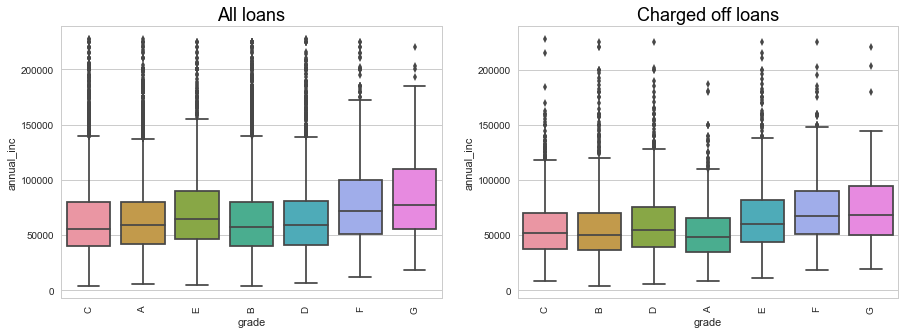

In [105]:
df=loans_final.loc[loans_final['annual_inc']<230000]
cont_cat_plot(df,'grade','annual_inc')

**Observation:**
<br> 75th percentile of annual_inc for all grades A to G are mostly falling under 100000
<br> There is a gradual increase in anual_inc with the falling loan grades

**term vs int_rate**

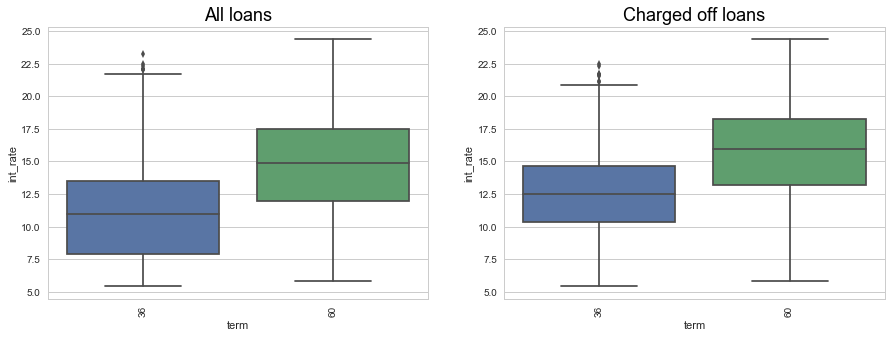

In [106]:
cont_cat_plot(loans_final,'term','int_rate')

**Observation:**
<br>Longer the term higher the interest rate

**loan_status vs int_rate**

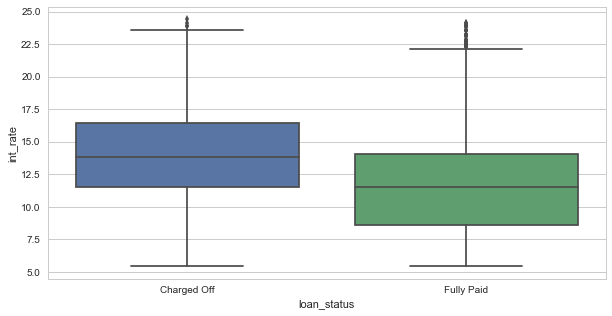

In [107]:
#loans_final.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status', y='int_rate', data=loans_final)
plt.show()


**Observation:**
<br>High rate of interest has more Charged Off loans

**loan_amt vs purpose**

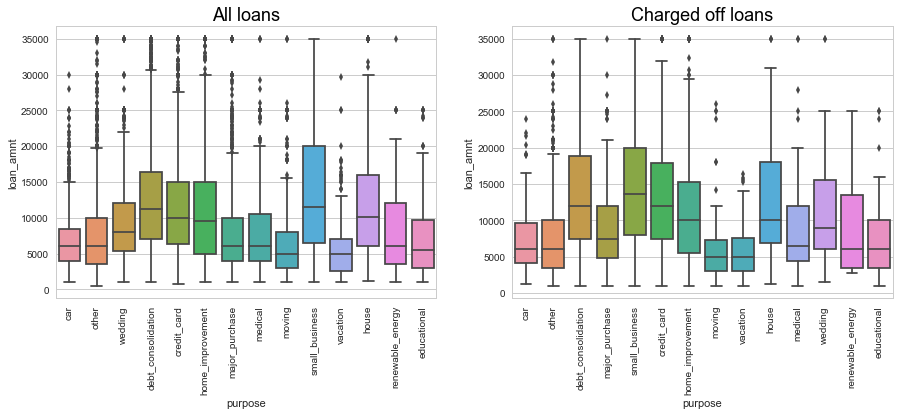

In [108]:
cont_cat_plot(loans_final,'purpose','loan_amnt')

**Observation:**

In case of Charged off loans, high amount loans approved for purposes: Debt Consolidation, Credit Cards, Small Business and Home Improvements. Number of defaulters are also high in these purpose categories.


**2.Categorical vs Categorical variable**

**loan_status vs term**

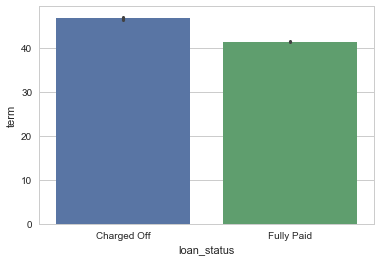

In [109]:
sns.barplot(y='term', x='loan_status', data=loans_final)
plt.show()

**Observation:**

Loan term is more in case of charged off loans

**loan_status vs revol_util**

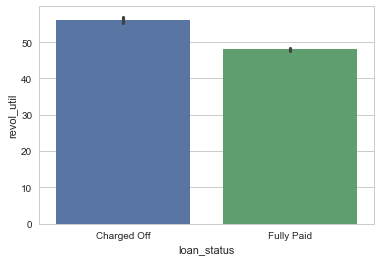

In [110]:
sns.barplot(y='revol_util', x='loan_status', data=loans_final)
plt.show()

**Observation:**

Utilization of revolving credit is more in case of defaulters.

**loan_status vs delinq_2yrs**

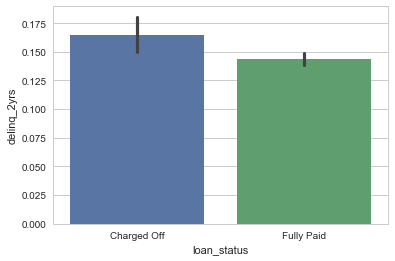

In [111]:
sns.barplot(y='delinq_2yrs', x='loan_status', data=loans_final)
plt.show()

Borrowers having incidences of past deliquency are likely to be defaulter

**grade vs revol_util**

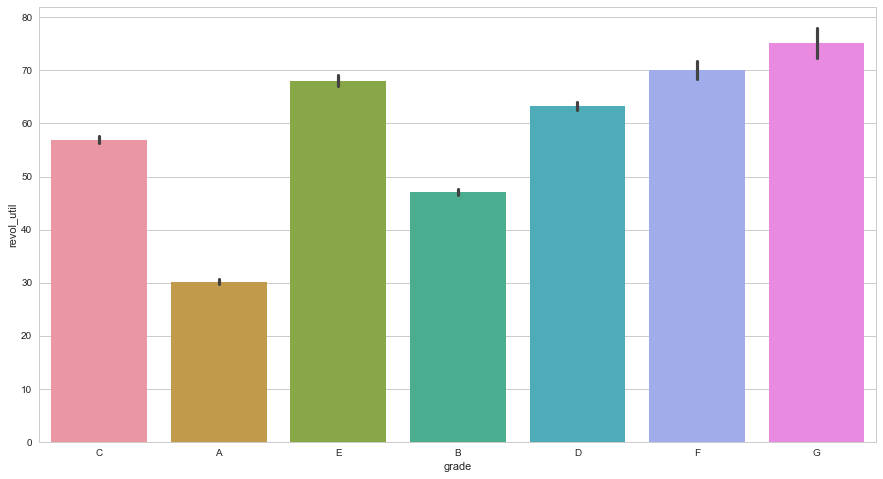

In [112]:
plt.figure(figsize=(15,8))
sns.barplot(x='grade', y='revol_util', data=loans_final)
plt.show()

**Observation:**

Utilization of revolving credit increases as the loan grade decreases.

**3.Continous vs Continous variable**

**loan_status vs purpose**

In [113]:
loans_final['annual_inc'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    3.542400e+04
mean     6.905660e+04
std      6.393197e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.241300e+04
90%      1.150000e+05
95%      1.400000e+05
99%      2.300000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

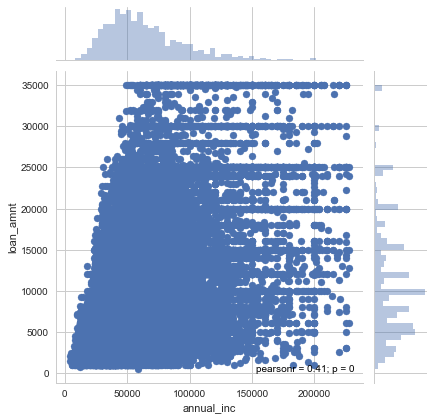

In [114]:
sns.jointplot('annual_inc', 'loan_amnt', loans_final.loc[loans_final['annual_inc']<230000])
plt.show()

**Observation:**
<br> There are instances where 25000 or above loan approved for Income less than 50000, which can be risky.

**loan_amnt vs int_rate**

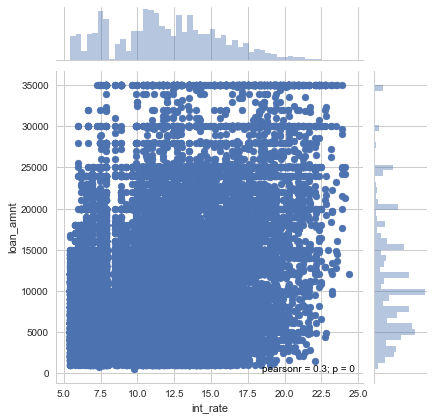

In [115]:
sns.jointplot('int_rate', 'loan_amnt', loans_final)

**Observation:**

<br> There are instances where high amount loans of 30000 and above for low interest rates  

**dti vs int_rate**

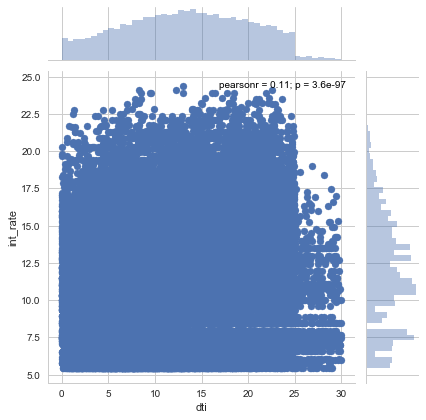

In [116]:
sns.jointplot(x='dti', y='int_rate', data=loans_final)

**Observation:**

There are instances where borrowers at high debt to income ratio taken loan at high interest rate, which increases the risk further.

**loan_amnt vs dti**

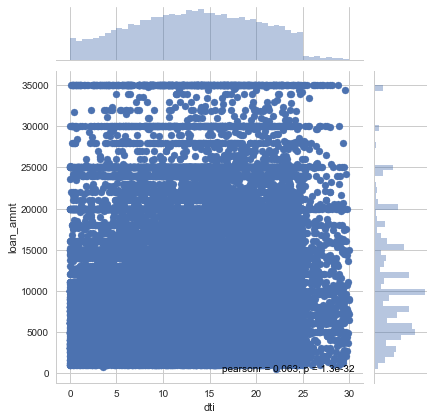

In [117]:
sns.jointplot('dti', 'loan_amnt', loans_final)

**Observation:**

There are instances of high amount loan approved to borrowers having hight debt to income ratio, which is risky.

**loan_amnt vs revol_util**

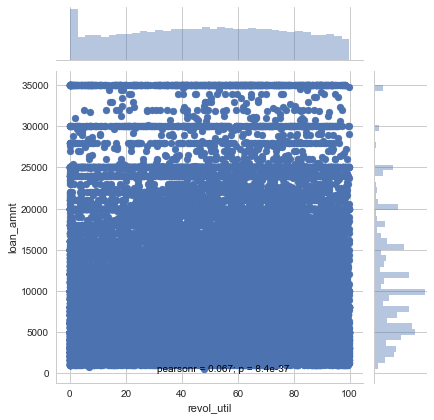

In [118]:
sns.jointplot('revol_util', 'loan_amnt', loans_final)

**Observation:**

There are instances of high amount loans (30-35K) where borrowers are at high revol_util rate. 

### Mutivariate Analysis

**loan_amt vs grade vs term**

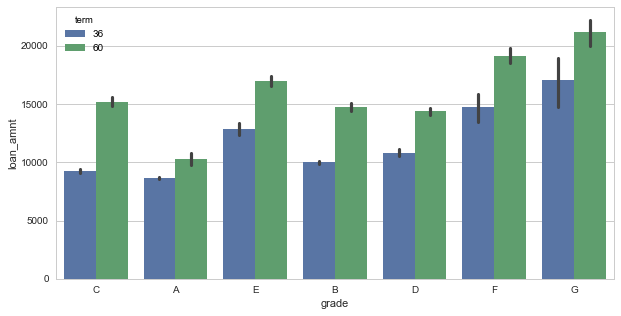

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loans_final, estimator=np.mean)
plt.show()

**Observation:**
<br> Higher the loan amount , longer the loan term and lower the grade.

**term vs loan_amnt vs loan_status**

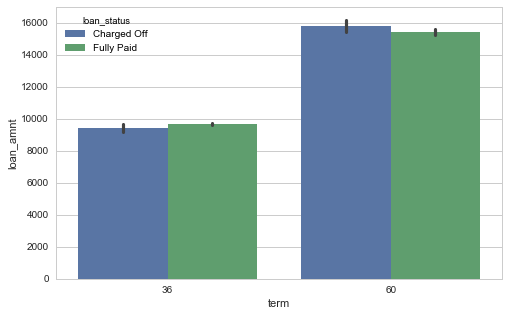

In [120]:
plt.figure(figsize=(8,5))

sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loans_final, estimator=np.mean)
plt.show()

**Observation:**
<br> Higher loan amount associated with higher term and higher number of charged off loan.

**pupose vs loan_amnt vs loan_status**

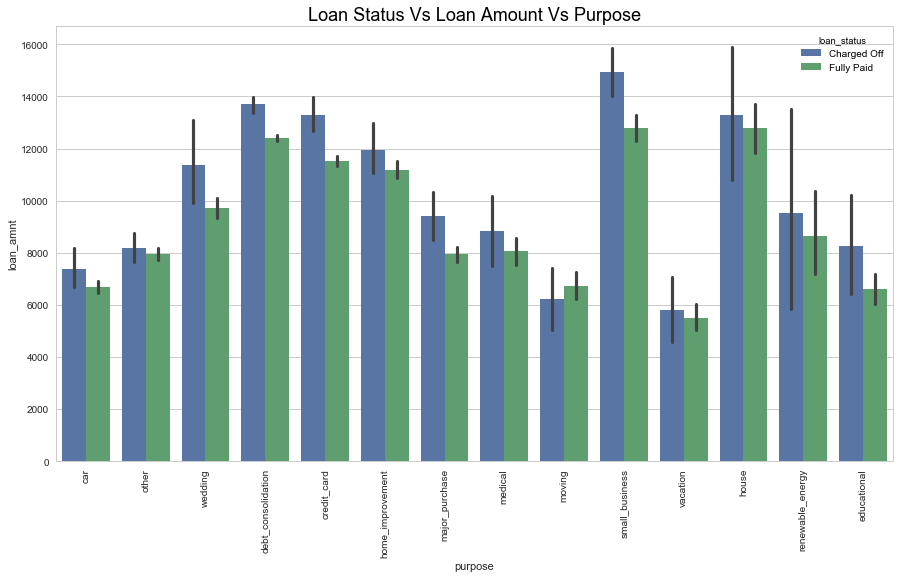

In [121]:
plt.figure(figsize=(15,8))
grp = sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=loans_final, estimator=np.mean)

grp.set_xticklabels(grp.get_xticklabels(), rotation=90)
grp.set_title('Loan Status Vs Loan Amount Vs Purpose',fontsize =18,color='Black')

plt.show()

**Observations:**
<br>1. Highest loan amount and highest charge off rate can be seen for the loans taken for Small Businesses, followed by Debt Consolidation and House/home improvements.

**grade vs revol_util vs loan_status**

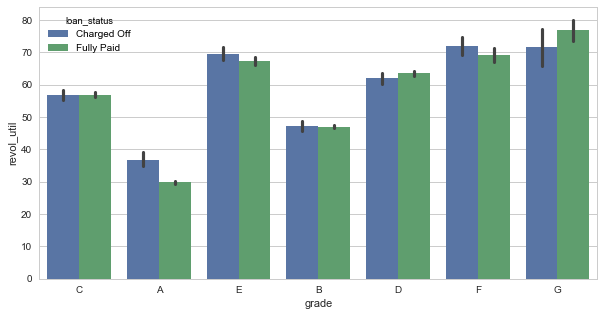

In [122]:
plt.figure(figsize=(10,5))

sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loans_final, estimator=np.mean)
plt.show()

**Observtion:**
<br> Borrowers with higher revol_util rate tend to get low grade loans and chances of getting defaulted is also higher.

**delinq_2yrs vs loan_amnt vs loan_status**

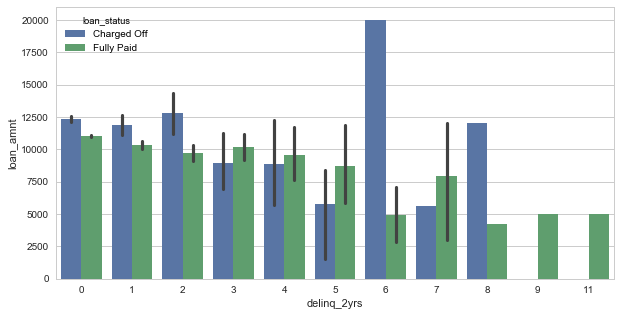

In [123]:
plt.figure(figsize=(10,5))

sns.barplot(x='delinq_2yrs', y='loan_amnt', hue="loan_status", data=loans_final, estimator=np.mean)
plt.show()

There are instances where high loan amounts approved to borrowers having higher incidences of past delinquencies, which is a risk.

**pub_rec_bankruptcies vs loan_amnt vs loan_status**

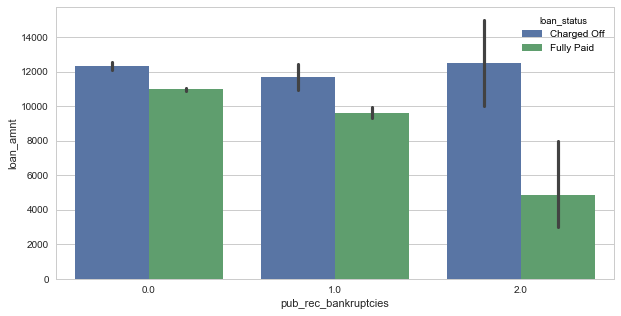

In [124]:
plt.figure(figsize=(10,5))

sns.barplot(x='pub_rec_bankruptcies', y='loan_amnt', hue="loan_status", data=loans_final, estimator=np.mean)
plt.show()

From the above chart it can be observed that chances of Charge off increases for borrowers having past bad credit record.


### Correlation Matrix and Coefficiency of all Continous Variables

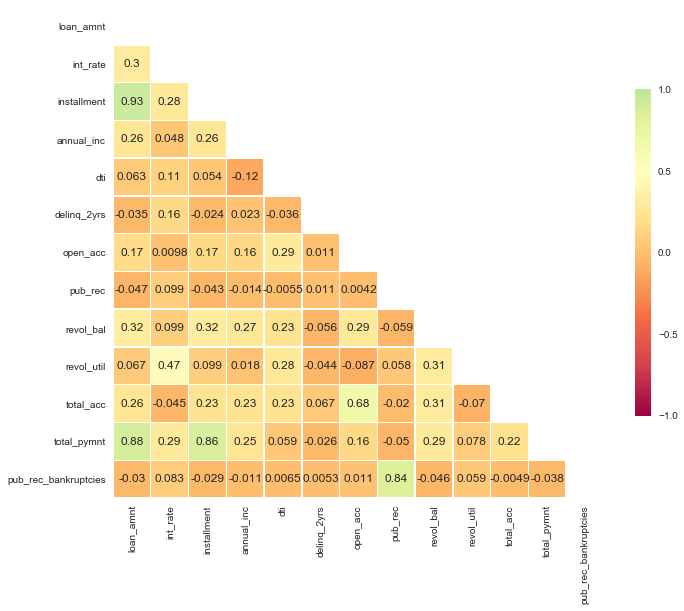

In [125]:
#Plot correlation matirx for selected variables

f, ax = plt.subplots(figsize=(11, 15))
contvars = ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'pub_rec_bankruptcies']

c = loans_final[contvars].corr()

mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(c, 
                      mask = mask,
                      square = True,
                      linewidths = 0.5,
                      cmap = 'Spectral',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      center= 0.5,
                      annot_kws = {"size": 12})

ax.set_yticklabels(c.columns, rotation = 0)
ax.set_xticklabels(c.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**Observations:**
<br>1. Loan amount is strongly correlated with number of Installments
<br>2. Loan amount is negatively correlated with delinq_2years and pub_rec i.e. higher instances of past delinquencies or public derogatory records results in low loan amount approval
<br>3. pub_rec is strongly correlated with pub_rec_bankruptcies
<br>4. dti is negatively correlated with annual_inc
<br>5. int_rate is negatively correlated with total number of accounts

**Key takeaways from Bivariate/Multivariate analysis:**

<br>1. It can be observed that higher loan amounts lower the loan grade.
<br>2. There is a gradual increase in anual_inc with the falling loan grades
<br>3. Longer the term higher the interest rate
<br>4. High rate of interest has more Charged Off loans
<br>5. In case of Charged off loans, high amount loans approved for purposes: Debt Consolidation, Credit Cards, Small Business and Home Improvements. Number of defaulters are also high in these purpose categories.
<br>6. Loan term is more in case of charged off loans
<br>7. Utilization of revolving credit is more in case of defaulters.
<br>8. Utilization of revolving credit increases as the loan grade decreases.
<br>9. There are instances where 25000 or above loan approved for Income less than 50000, which can be risky.
<br>10. There are instances where high amount loans of 30000 and above for low interest rates
<br>11. There are instances where borrowers at high debt to income ratio taken loan at high interest rate, which increases the risk further.
<br>12. There are instances of high amount loan approved to borrowers having hight debt to income ratio, which is risky.
<br>13. There are instances of high amount loans (30-35K) where borrowers are at high revol_util rate.
<br>14. Higher the loan amount , longer the loan term and lower the grade.
<br>15. Higher loan amount associated with higher term and higher number of charged off loan.
<br>16. Borrowers with higher revol_util rate tend to get low grade loans and chances of getting defaulted is also higher.
<br>17. Highest loan amount and highest charge off rate can be seen for the loans taken for Small Businesses, followed by Debt Consolidation and House/home improvements.
<br>18. Loan amount is strongly correlated with number of Installments
<br>19. Loan amount is negatively correlated with delinq_2years and pub_rec i.e. higher instances of past delinquencies or public derogatory records results in low loan amount approval
<br>20. pub_rec is strongly correlated with pub_rec_bankruptcies
<br>21. dti is negatively correlated with annual_inc
<br>22. int_rate is negatively correlated with total number of accounts